<a href="https://colab.research.google.com/github/GuilhermeGNO/Projetos-Data-Science/blob/main/Perform_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Importando bibliotecas que iremos utilizar e carregando nosso dataset

In [ ]:
https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Criando nosso DataFrame
# Colocado dentro de uma variável o endereço do arquivo csv para facilitar o acesso e montagem do arquivo para analise
path = '/content/drive/MyDrive/Data Science/Projetos - Data Science/Exploratory Data Analysis/How To Perform Exploratory Data Analysis/Automobile_data.csv'

# Criando uma variável que ira conter nosso conjunto de dados
veiculos = pd.read_csv(path)

# Gerando exibição das primeiras 5 linhas do conjunto de dados
veiculos.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# Renomeando os nomes das colunas do dataset para facilitar o entendimento dos dados
colunas = ['simbolo','normalized_losses','Fabricante','Tipo de combustivel',
      'aspiration','Numero de Portas','body_style','drive_wheels_engine',
      'Localizacao do motor','wheel_base','Altura','Largura','Peso','curb_weight',
      'Tipo Motor','Numero Cilindros','Tamanho do Motor','Sistema de combustível',
      'bore','stroke','compression_ratio','HP(potencia)','RPM Max','city_mpg','highway_mpg','Preco']

veiculos.columns = colunas
veiculos.head()

,simbolo,normalized_losses,Fabricante,Tipo de combustivel,aspiration,Numero de Portas,body_style,drive_wheels_engine,Localizacao do motor,wheel_base,Altura,Largura,Peso,curb_weight,Tipo Motor,Numero Cilindros,Tamanho do Motor,Sistema de combustível,bore,stroke,compression_ratio,HP(potencia),RPM Max,city_mpg,highway_mpg,Preco
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


2. Verificando valores faltantes ou nulos

In [ ]:
# Verificando valores nulos
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
# Verificando tipos dos dados do dataset
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Checando por entradas incorretas no dataset, por exemplo, símbolos
for col in auto.columns:
    print('{} : {}'.format(col, auto[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized-losses : [nan '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num-of-doors : ['two' 'four' nan]
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels : ['rwd' 'fwd' '4wd']
engine-location : ['front' 'rear']
wheel-base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [ ]:
# Substituindo os símbolos '?' pelo tipo np.nan
for col in auto.columns:
    auto[col].replace('?', np.nan, inplace=True)

In [ ]:
# Contando novamente os valores nulos
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

3. Visualizando os dados

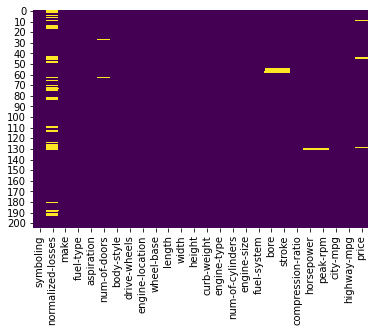

In [ ]:
# Plotando uma visualização para entendermos melhor os dados faltantes
sns.heatmap(auto.isnull(), cbar=False, cmap='viridis')

4. Substituindo os valores nulos

In [ ]:
# Substituindo os valores nulos
num_col = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

for col in num_col:
    auto[col] = pd.to_numeric(auto[col])
    auto[col].fillna(auto[col].mean(), inplace=True)

auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


5. Levantando questões analiticas e visualizações

Pois bem, esse processo torna-se um dos mais importantes em EDA. Neste processo iremos verificar quão bem podemos pensar como analistas, porém esse passo se difere de pessoa a pessoa quanto sua habilitade de formular questões. Uma dica é tentar elaborar questões utilizando variáveis independentes e variável alvo. Por exemplo, como o tipo de combustível pode influênciar no custo do veículo ?

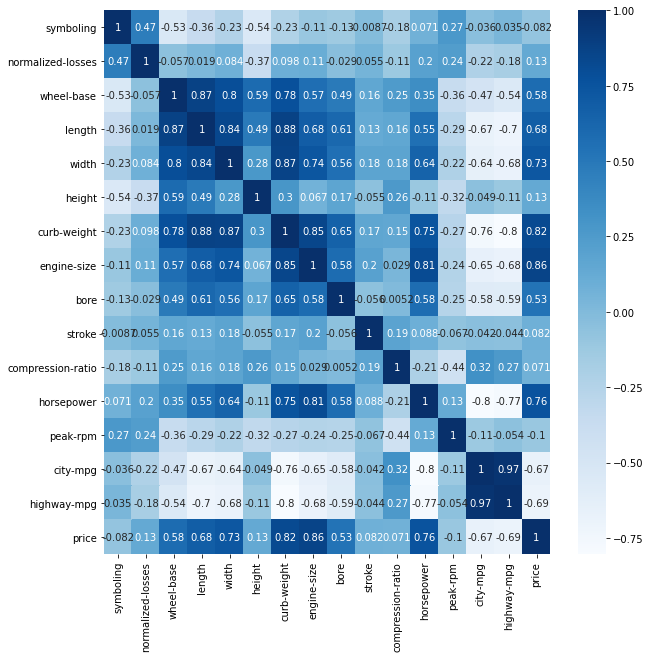

In [ ]:
# Plotando um heatmap (gráfico de 'calor') para visualizarmos as relações dos dados
plt.figure(figsize=(10,10))
sns.heatmap(auto.corr(), cbar=True, annot=True, cmap='Blues')
plt.show()

**Correlações positivas**

Price – wheel_base, length, width, curb_weight, engine_size, bore, horsepower

wheelbase – length, width, height, curb_weight, engine_size, price

horsepower – length, width, curb_weight, engine_size, bore, price

Highway mpg – city mpg


**Correlações negativas**

Price – highway_mpg, city_mpg
highway_mpg – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price
city – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price

Este mapa de calor nós forneceu bons insights sobre nossos dados. Pois bem, agora vamos aplicar nosso conhecimento dos dados e que afetam o valor final do veículos.

1. Como horsepower(potência) afeta o preço do veículo?

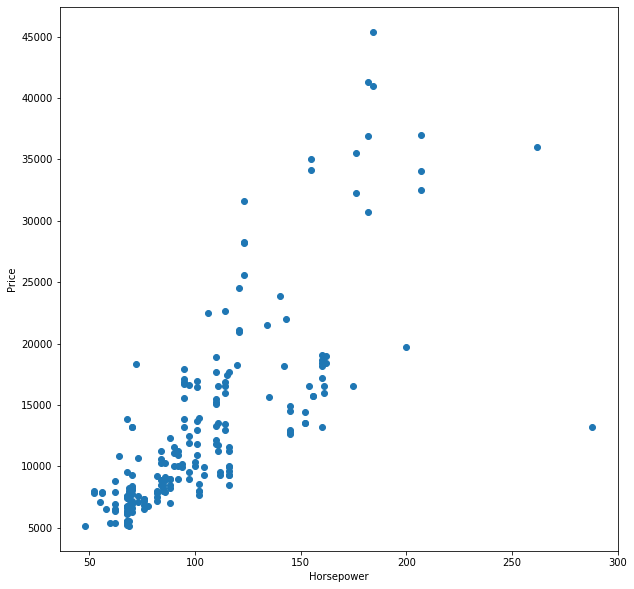

In [ ]:
# Plotando um gráfico de dispersão
plt.figure(figsize=(10,10))
plt.scatter(x='horsepower', y='price', data=auto)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

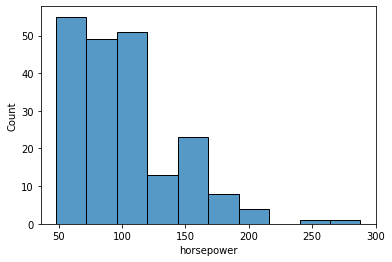

In [ ]:
sns.histplot(auto['horsepower'], bins=10)

2. Qual a relação entre 'tamanho' do motor e preço do veículo?

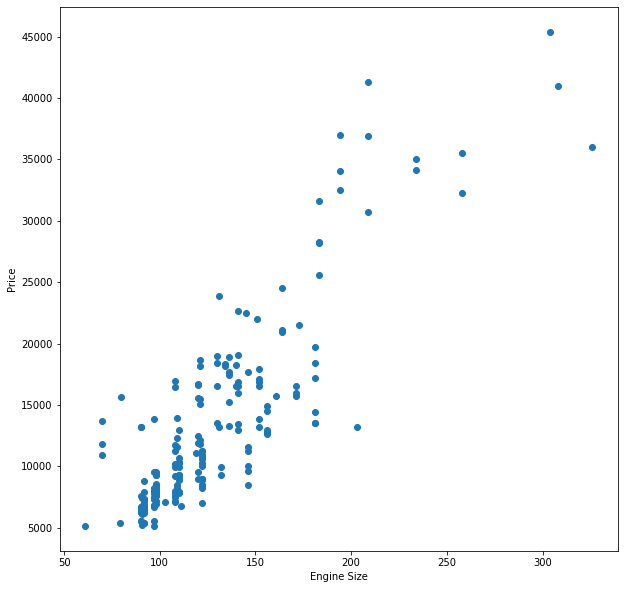

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='engine-size', y = 'price', data=auto)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

3.How does highway_mpg affects price?

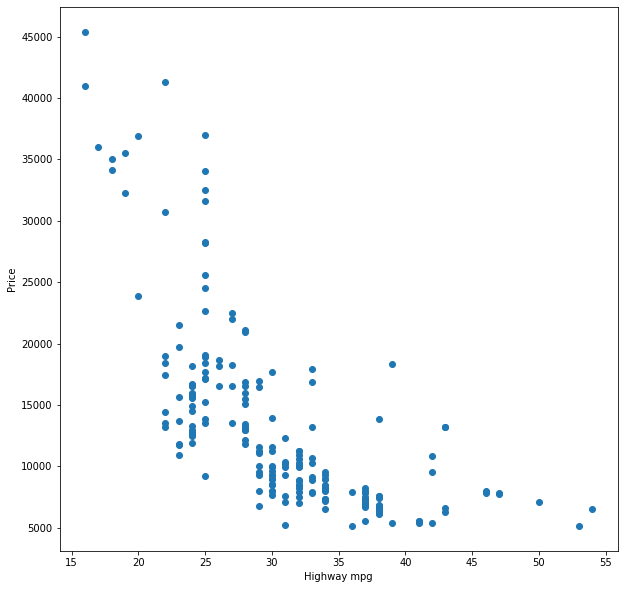

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x = 'highway-mpg', y = 'price', data=auto)
plt.xlabel('Highway mpg')
plt.ylabel('Price')
plt.show()

In [ ]:
# Verificando o número de portas
auto['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

4. Relação de números de portas e valor do veículo ?

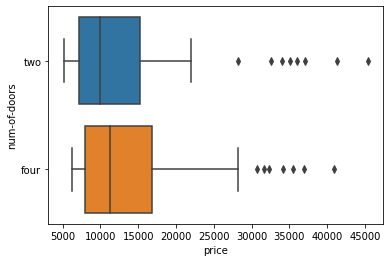

In [ ]:
# Plotando um gráfico BoxPlot para analisar as relações
sns.boxplot(x='price', y = 'num-of-doors', data=auto)